In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
df = pd.read_csv('data/covid19-download.csv')

In [3]:
df.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,35,Ontario,Ontario,2020-01-31,NaN,3,0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Canada,Canada,2020-01-31,NaN,4,0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[df.prname == 'Quebec'].reset_index(drop=True)

In [5]:
df['date'] = pd.to_datetime(df.date)

In [6]:
df = df[df.date < '2020-05-01']
df.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7
0,24,Quebec,Québec,2020-03-01,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Quebec,Québec,2020-03-03,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Quebec,Québec,2020-03-05,NaN,2,0,0.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['day'] = (df.date-df.date[0]).dt.days
df.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,day
0,24,Quebec,Québec,2020-03-01,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,24,Quebec,Québec,2020-03-03,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,24,Quebec,Québec,2020-03-05,NaN,2,0,0.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [8]:
dfb1 = df[df.date < '2020-03-20']

In [9]:
dfb1.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,day
0,24,Quebec,Québec,2020-03-01,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,24,Quebec,Québec,2020-03-03,NaN,1,0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,24,Quebec,Québec,2020-03-05,NaN,2,0,0.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [10]:
xb1 = dfb1['day']
yb1 = dfb1['numtoday']
xmin, xmax = xb1.min(), xb1.max()
est = sm.OLS(yb1, xb1).fit(cov_type = 'HC2')
xb1fit = np.linspace(xmin, xmax, 100)
yb1fit = est.predict(xb1fit)
est.summary()

C:\Users\plick\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               numtoday   R-squared (uncentered):                   0.561
Model:                            OLS   Adj. R-squared (uncentered):              0.531
Method:                 Least Squares   F-statistic:                              8.538
Date:                Mon, 25 Jan 2021   Prob (F-statistic):                      0.0105
Time:                        19:31:07   Log-Likelihood:                         -58.622
No. Observations:                  16   AIC:                                      119.2
Df Residuals:                      15   BIC:                                      120.0
Df Model:                           1                                                  
Covariance Type:                  HC2                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
day            0.9495      0.325      2.922      0.003       0.313       1.586
==============================================================================
Omnibus:                       27.055   Durbin-Watson:                   0.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.296
Skew:                           2.441   Prob(JB):                     4.83e-09
Kurtosis:                       8.798   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

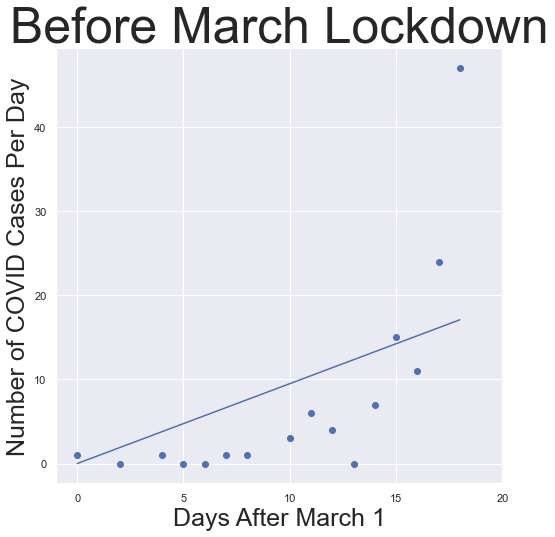

In [11]:
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(xb1, yb1)
plt.plot(xb1fit, yb1fit)
plt.title("Before March Lockdown", fontsize=50)
ax.set_xlabel("Days After March 1", fontsize=25)
ax.set_xlim(-1, 20)
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
plt.show()

In [12]:
dfa1 = df[(df.date > '2020-03-19')
        & (df.date < '2020-05-01')]

In [13]:
dfa1.head(3)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,day
16,24,Quebec,Québec,2020-03-20,NaN,139,0,1.0,139,8539.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
17,24,Quebec,Québec,2020-03-21,NaN,202,19,4.0,221,8539.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
18,24,Quebec,Québec,2020-03-22,NaN,221,0,4.0,221,8539.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [14]:
xa1 = dfa1['day']
xa1 = sm.add_constant(xa1)
ya1 = dfa1['numtoday']
xmin, xmax = xa1.min(), xa1.max()
est = sm.OLS(ya1, xa1).fit(cov_type='HC2')
xa1fit = np.linspace(xmin, xmax, 100)
ya1fit = est.predict(sm.add_constant(xa1fit))
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     50.36
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.38e-08
Time:                        19:31:08   Log-Likelihood:                -274.41
No. Observations:                  42   AIC:                             552.8
Df Residuals:                      40   BIC:                             556.3
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4410    103.161      0.169      0.866    -184.751     219.633
day           16.0847      2.267      7.096      0.000      11.642      20.527
==============================================================================
Omnibus:                        1.190   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                0.794
Skew:                           0.337   Prob(JB):                        0.672
Kurtosis:                       3.002   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

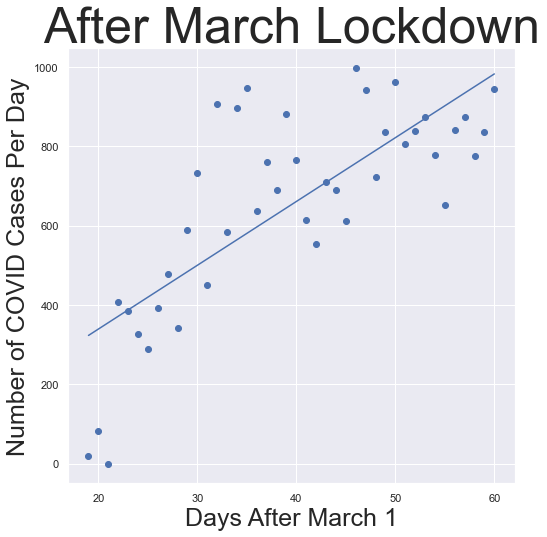

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
plt.scatter(xa1.day, ya1)
plt.plot(xa1fit[:,1], ya1fit)
plt.title("After March Lockdown", fontsize=50)
ax.set_xlabel("Days After March 1", fontsize=25)
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
plt.show()

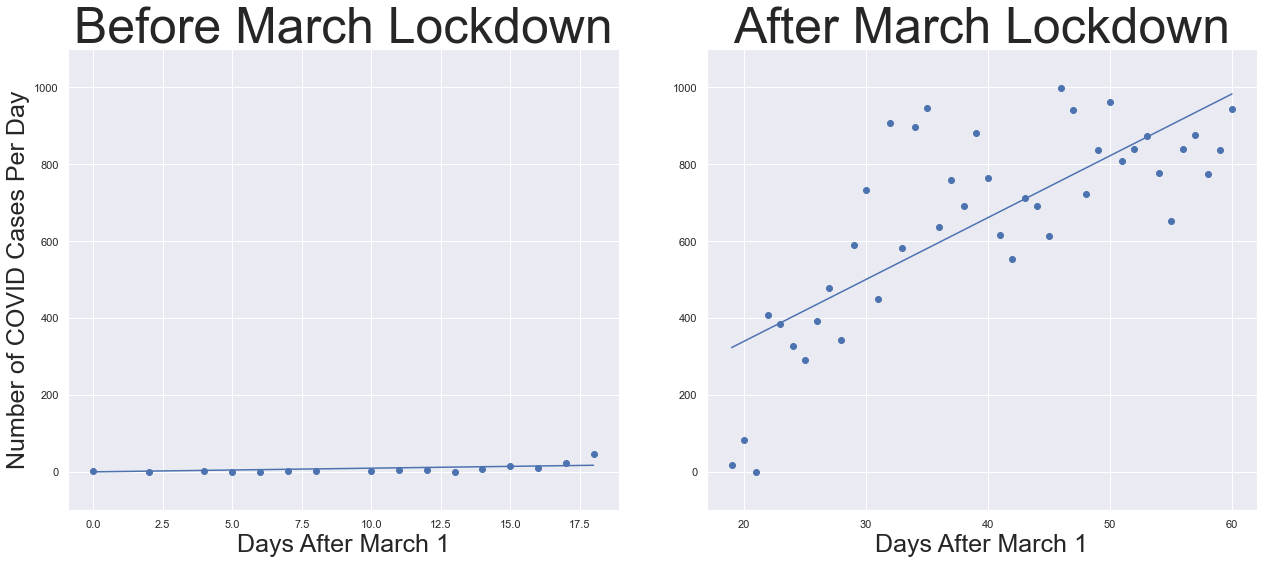

In [16]:
fig, axes = plt.subplots(1,2, figsize = (18,8))
for iter_, ax in enumerate(axes.flatten()):
    if iter_ == 0:
        ax.scatter(xb1, yb1)
        ax.plot(xb1fit, yb1fit)
        ax.set_title("Before March Lockdown", fontsize=50)
        ax.set_xlabel("Days After March 1", fontsize=25)
        ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
        ax.set_ylim(-100,1100)
    else:
        ax.scatter(xa1.day, ya1)
        ax.plot(xa1fit[:,1], ya1fit)
        ax.set_title("After March Lockdown", fontsize=50)
        ax.set_xlabel("Days After March 1", fontsize=25)
        ax.set_ylim(-100,1100)
        plt.tight_layout()

In [17]:
Xb1 = pd.DataFrame(xb1)
Xb1['day2'] = Xb1.day ** 2
est = sm.OLS(yb1, Xb1).fit(cov_type = 'HC2')
xmin, xmax = Xb1.min(), Xb1.max()
Xb1fit = np.linspace(xmin, xmax, 100)
yb1fit = est.predict(Xb1fit)
est.summary()

C:\Users\plick\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               numtoday   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              9.453
Date:                Mon, 25 Jan 2021   Prob (F-statistic):                     0.00252
Time:                        19:31:09   Log-Likelihood:                         -51.727
No. Observations:                  16   AIC:                                      107.5
Df Residuals:                      14   BIC:                                      109.0
Df Model:                           2                                                  
Covariance Type:                  HC2                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
day           -1.6846      0.775     -2.174      0.030      -3.204      -0.166
day2           0.1866      0.067      2.788      0.005       0.055       0.318
==============================================================================
Omnibus:                        4.169   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                1.765
Skew:                           0.500   Prob(JB):                        0.414
Kurtosis:                       4.283   Cond. No.                         61.9
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [18]:
Xa1 = pd.DataFrame(xa1)
Xa1['day2'] = Xa1.day ** 2
est = sm.OLS(ya1, Xa1).fit(cov_type = 'HC2')
xmin, xmax = Xa1.min(), Xa1.max()
Xa1fit = np.linspace(xmin, xmax, 100)
ya1fit = est.predict(Xa1fit)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     66.21
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           2.89e-13
Time:                        19:31:09   Log-Likelihood:                -264.60
No. Observations:                  42   AIC:                             535.2
Df Residuals:                      39   BIC:                             540.4
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1077.0488    240.273     -4.483      0.000   -1547.975    -606.123
day           77.2625     13.263      5.825      0.000      51.268     103.257
day2          -0.7744      0.167     -4.647      0.000      -1.101      -0.448
==============================================================================
Omnibus:                        0.961   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                1.008
Skew:                           0.311   Prob(JB):                        0.604
Kurtosis:                       2.564   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

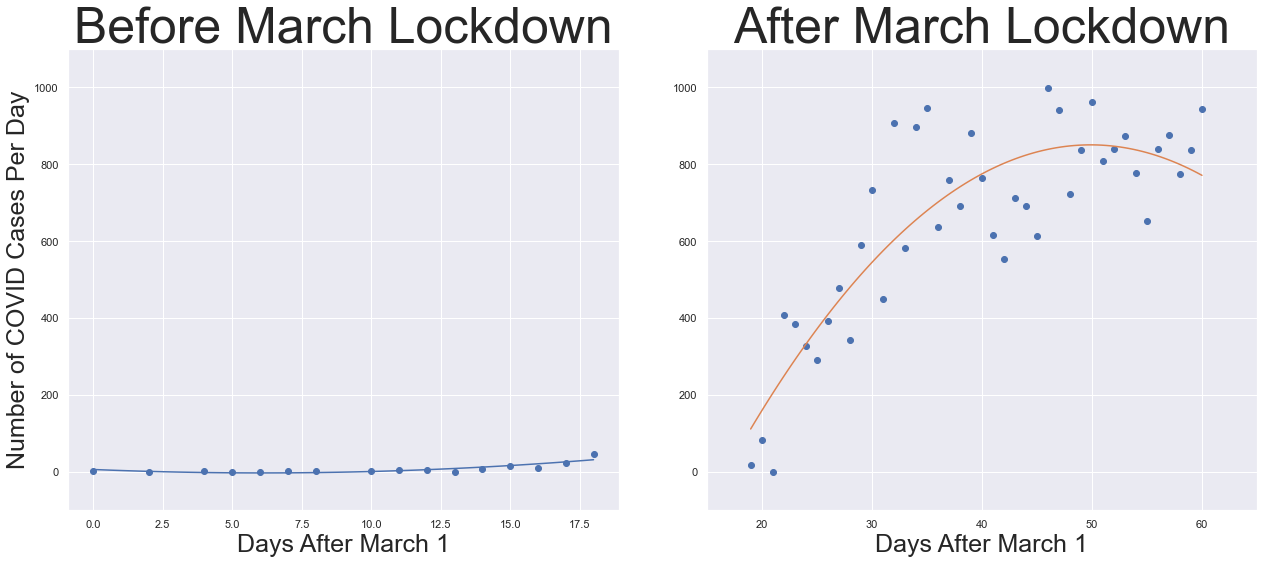

In [19]:
fig, axes = plt.subplots(1,2, figsize = (18,8))
for iter_, ax in enumerate(axes.flatten()):
    if iter_ == 0:
        ax.scatter(xb1, yb1)
        coefficients = np.polyfit(xb1, yb1, 2)
        yb1fit = np.polyval(coefficients, xb1fit)
        ax.plot(xb1fit, yb1fit)
        ax.set_title("Before March Lockdown", fontsize=50)
        ax.set_xlabel("Days After March 1", fontsize=25)
        ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
        ax.set_ylim(-100,1100)
    else:
        ax.scatter(xa1.day, ya1)
        coefficients = np.polyfit(xa1.day, ya1, 2)
        ya1fit = np.polyval(coefficients, xa1fit)
        ax.plot(xa1fit, ya1fit)
        ax.set_title("After March Lockdown", fontsize=50)
        ax.set_xlabel("Days After March 1", fontsize=25)
        ax.set_xlim(15,65)
        ax.set_ylim(-100,1100)
        plt.tight_layout()

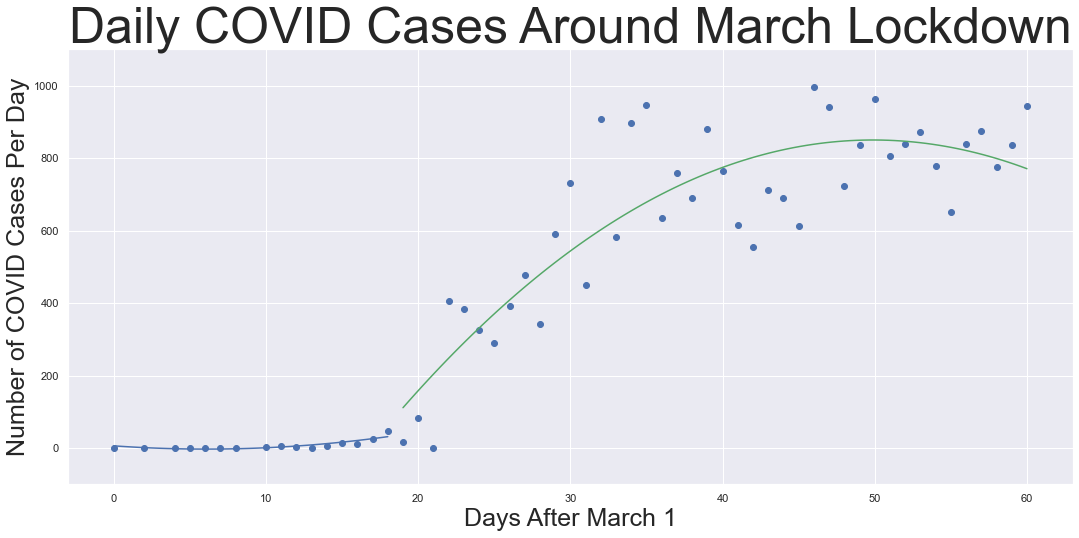

In [20]:
fig, ax = plt.subplots(figsize = (18,8))
x = df['day']
y = df['numtoday']
plt.scatter(x, y)
ax.plot(xb1fit, yb1fit)
ax.plot(xa1fit, ya1fit)
plt.title("Daily COVID Cases Around March Lockdown", fontsize=50)
ax.set_xlabel("Days After March 1", fontsize=25)
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
ax.set_ylim(-100,1100)
plt.show()

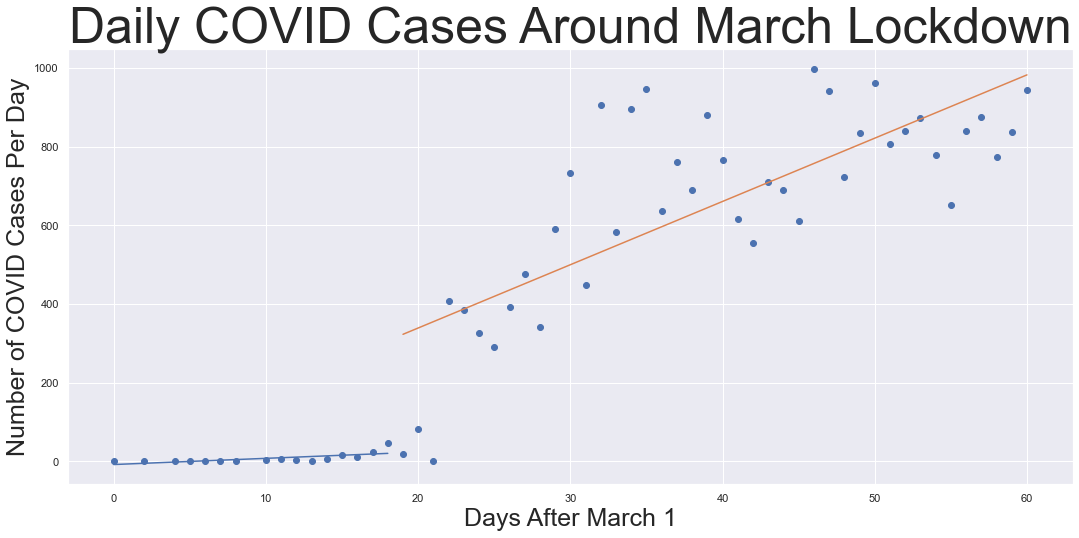

In [22]:
fig, ax = plt.subplots(figsize = (18,8))
x = df['day']
y = df['numtoday']
plt.scatter(x, y)
xb1 = dfb1['day']
xb1 = sm.add_constant(xb1)
xmin, xmax = xb1.min(), xb1.max()
est = sm.OLS(yb1, xb1).fit(cov_type='HC2')
xb1fit = np.linspace(xmin, xmax, 100)
yb1fit = est.predict(sm.add_constant(xb1fit))
ax.plot(xb1fit[:,1], yb1fit)
xa1 = dfa1['day']
xa1 = sm.add_constant(xa1)
xmin, xmax = xa1.min(), xa1.max()
est = sm.OLS(ya1, xa1).fit(cov_type='HC2')
xa1fit = np.linspace(xmin, xmax, 100)
ya1fit = est.predict(sm.add_constant(xa1fit))
ax.plot(xa1fit[:,1], ya1fit)
plt.title("Daily COVID Cases Around March Lockdown", fontsize=50)
ax.set_xlabel("Days After March 1", fontsize=25)
ax.set_ylabel("Number of COVID Cases Per Day", fontsize=25)
#ax.set_ylim(-100,1100)
plt.show()

For the time before the March lockdown, the 1st of March was used in order to include as much data as possible for the regression analysis.  For the time period after the March lockdown, data was taken up until the end of April.  The median is 5 to 6 days between exposure and sympton onset, but the incubation period could last as long as 14 days [1].  A time period was chosen such that there was a comarable amount of time on either side of the lockdown, with an additional period of 2 weeks to allow for the effects of the lockdown to be seen.  Enough time was allowed to see a slight decrease in the rate of the number of cases, which is easiest to fisualize with the degree 2 polynomial fit.

Initially, a linear model was applied to the data.  A constant term was not used for the time period before the March lockdown since we would expect close to zero COVID cases on March 1st.  A constant term was used for the time period after the lockdown since we would not want a model that predicts zero COVID cases at the time of the first lockdown. The R^2 score was seen to be 0.561 for the time period to the left of the March lockdown.  A marginally better R^2 score of 0.578 was observed for the time period to the right of the first lockdown.  A polynomial of degree 2 was then added to both time periods.  While this resulted in an improved R^2 score, the linear model was selected since it was easiest to see the effect of the March lockdown.

Looking at the coefficients of the linear regression, the coefficient was equal to approximately 0.95 COVID cases per day until the March lockdown.  The p-value of this coefficient was 0.003, so we can be quite confident that this coefficient is representative of the data.  To the right of this lockdown, the constant term was equal to approximately 17.44 COVID cases, with the coefficient around 16.09 cases per day. The p-value of this coefficient was 0.000, so we can be confident that this coefficient is representative of the data. The fact that the coefficient has increased does not necessarily mean the March lockdown was ineffective.  As the plot above shows, the number of COVID cases what increasing when the lockdown was put in place on March 20th.  It is quite likely that the number of cases would have continued to increase at an even faster rate had the lockdown not been put in place.  While the majority of non-essential businesses were closed at this point, there were no regulations requiring masks to be worn, which may have somewhat slowed the increase in the number of cases.

[1] https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection/health-professionals.html